In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_data_df = pd.merge(ride_data_df, city_data_df, how='inner', on='city')

#export_csv = combined_data_df.to_csv ('combined_data.csv', index = None, header=True) 

# Display the data table for preview

combined_data_df.head()



,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

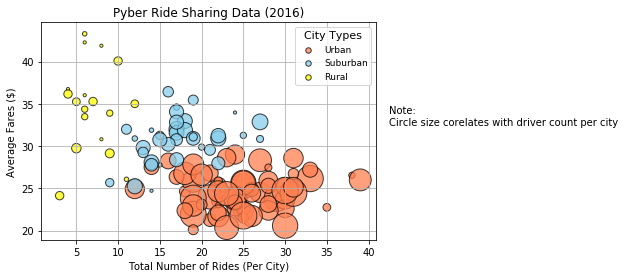

In [2]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


combined_grouped_df = combined_data_df.groupby("city")
ride_count = combined_grouped_df["ride_id"].count()
avg_fare = combined_grouped_df["fare"].mean()
driver_count = combined_grouped_df["driver_count"].mean()
city_type = combined_grouped_df["type"].max()

combined_summary_df = pd.DataFrame({"ride count": ride_count, "average fare": avg_fare, "driver count": driver_count, "type": city_type})
#combined_summary_df.head(5)

urban_summary_df = combined_summary_df.loc[combined_summary_df["type"] == "Urban",:]
suburban_summary_df = combined_summary_df.loc[combined_summary_df["type"] == "Suburban",:]
rural_summary_df = combined_summary_df.loc[combined_summary_df["type"] == "Rural",:]


urban_plt = urban_summary_df.plot.scatter(x="ride count", y= "average fare", marker="o", color="coral", edgecolors="black", s=urban_summary_df["driver count"]*10, alpha=0.75,label="Urban",linewidth=1)
suburban_plt = suburban_summary_df.plot.scatter(x="ride count", y= "average fare", marker="o", color="skyblue", edgecolors="black",s=suburban_summary_df["driver count"]*10, alpha=0.75, label="Suburban",linewidth=1, ax=urban_plt)
rural_plt = rural_summary_df.plot.scatter(x="ride count", y= "average fare",marker="o", color="yellow", edgecolors="black",s=rural_summary_df["driver count"]*10, alpha=0.75, label="Rural",linewidth=1, ax= urban_plt)


# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fares ($)")
py_legend = plt.legend(title= 'City Types', loc= "upper right", markerscale= .75, prop={'size': 9})
py_legend.legendHandles[0]._sizes = [30]
py_legend.legendHandles[1]._sizes = [30]
py_legend.legendHandles[2]._sizes = [30]
py_legend.get_title().set_fontsize('11') 
plt.text(42.5, 32.5, str(f"Note:\nCircle size corelates with driver count per city"))
plt.grid()
plt.savefig("Images/RideSharing_Bubbleplot.png")
plt.show()


## Total Fares by City Type

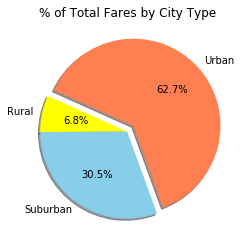

In [3]:
# Calculate Type Percents
urban_df = combined_data_df.loc[combined_data_df["type"] == "Urban", :].groupby("city") 
suburban_df = combined_data_df.loc[combined_data_df["type"] == "Suburban", :].groupby("city")
rural_df = combined_data_df.loc[combined_data_df["type"] == "Rural", :].groupby("city")

#Fares
urban_fare = sum(urban_df["fare"].sum().to_list()) 
suburban_fare = sum(suburban_df["fare"].sum().to_list()) 
rural_fare = sum(rural_df["fare"].sum().to_list()) 

# Build Pie Chart
labels = ["Urban", "Rural", "Suburban"]

# The values of each section of the pie chart
sizes = [urban_fare, rural_fare, suburban_fare]

# The colors of each section of the pie chart
colors = ["coral", "yellow", "skyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

plt.pie(sizes, labels=labels, explode=explode,colors=colors, autopct="%1.1f%%", shadow=True, startangle=290)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Images/Total_FaresbyCity.png")
plt.show()


## Total Rides by City Type

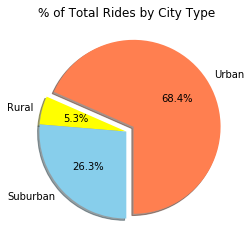

In [4]:
# Calculate Ride Percents

#Rides
urban_ride_counts = urban_df["ride_id"].count().sum()
suburban_ride_counts = suburban_df["ride_id"].count().sum()
rural_ride_counts = rural_df["ride_id"].count().sum()

# Build Pie Chart
labels = ["Urban", "Rural", "Suburban"]

# The values of each section of the pie chart
sizes = [urban_ride_counts, rural_ride_counts,suburban_ride_counts]

# The colors of each section of the pie chart
colors = ["coral", "yellow", "skyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct="%1.1f%%", shadow=True, startangle=270)
plt.title("% of Total Rides by City Type")

# Save Figure

plt.savefig("Images/Total_RidesbyCity.png")
plt.show()



## Total Drivers by City Type

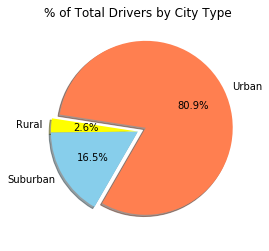

In [5]:
# Calculate Driver Percents
 
driver_sum_df = city_data_df.loc[city_data_df["type"] == "Urban", :].groupby("type")
driver = sum(driver_sum_df["driver_count"].sum().to_list())
#driver_urban_ride_cnt = driver_sum_df["driver_count"].sum()
#driver_urban_ride_cnt

sub_driver_sum_df = city_data_df.loc[city_data_df["type"] == "Suburban", :].groupby("type")
subdriver = sum(sub_driver_sum_df["driver_count"].sum().to_list())
#sub_driver_ride_cnt = sub_driver_sum_df["driver_count"].sum()
#sub_driver_ride_cnt

rural_driver_sum_df = city_data_df.loc[city_data_df["type"] == "Rural", :].groupby("type") 
ruraldriver = sum(rural_driver_sum_df["driver_count"].sum().to_list())
#rural_driver_ride_cnt = rural_driver_sum_df["driver_count"].sum()
#rural_driver_ride_cnt

# Build Pie Chart
labels = ["Urban", "Rural", "Suburban"]

# The values of each section of the pie chart
sizes = [driver, ruraldriver,subdriver]

# The colors of each section of the pie chart
colors = ["coral", "yellow", "skyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

plt.pie(sizes, labels=labels, explode=explode,colors=colors, autopct="%1.1f%%", shadow=True, startangle=240)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Images/Total_DriversbyCity.png")
plt.show()

